In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Slope Field

In [2]:
sizeSl = 4
stepSl = 0.3
radiusSl = stepSl / 3

In [28]:
def slopeField(foo, fooSet=None, additionalF=None):
    axes = plt.gca()
    axes.set_xlim([-4, 4]) 
    axes.set_ylim([-4, 4])
    for t in np.arange(- sizeSl + radiusSl, sizeSl, stepSl):
        for x in np.arange(- sizeSl + radiusSl, sizeSl, stepSl):
            curGrad = foo(t, x)
            if abs(curGrad) < 1:
                plt.plot([t - radiusSl, t + radiusSl], [x - radiusSl  * curGrad, x + radiusSl * curGrad],  color = 'orange')
            else:
                plt.plot([t - radiusSl * 1 / curGrad, t + radiusSl * 1 / curGrad], [x - radiusSl, x + radiusSl],  color = 'orange')
    if fooSet != None:
        for foo1 in fooSet:
            newRange = np.arange(- sizeSl + 0.005 + radiusSl, sizeSl, 0.01)
            plt.plot(newRange, foo1(newRange))
    if additionalF != None:
        intersect = np.arange(-sizeSl, sizeSl, 0.001)
        plt.plot(intersect, additionalF(intersect), color="navy")
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.show()

## Integral Curve

In [4]:
sizeInt = 4
stepInt = 0.003
radiusInt = stepInt / 3

In [5]:
def integralCurve(foo, t1, t2, requiredRange, stepInt):
    colors = ["maroon", "darkcyan", "forestgreen", "crimson", "orchid"]
    axes = plt.gca()
    axes.set_ylim([-10, 10])
    step = -1
    for startPoint in requiredRange:
        step += 1
        x = startPoint
        for t in np.arange(t1, t2, stepInt):
            curGrad = foo(t, x)
            plt.plot([t, t + stepInt], [x, x + stepInt * curGrad],  color = colors[step])
            if abs(curGrad) > 1000.0:
                break
            x = x + stepInt * curGrad
    
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.show()

## Vector Field

In [6]:
sizeVec = 2
stepVec = 0.4

In [7]:
def vectorField(foo):
    axes = plt.gca()
    axes.set_xlim([-2.5, 2.5]) 
    axes.set_ylim([-4, 4])
    for x in np.arange(-sizeVec, sizeVec, stepVec):
        for y in np.arange(-sizeVec, sizeVec, stepSl):
            curVec = foo(x, y)
            axes.arrow(x, y, x + curVec[0], y + curVec[1], head_width=0.15, head_length=0.3, fc='r', ec='k')
            #plt.plot([x, x + curVec[0]], [y, y + curVec[1]], color = 'darkgreen')
    plt.xlabel('x(t)')
    plt.ylabel('y(t)')
    plt.show()

## Phase Path

In [8]:
sizePhase = 4
stepPhase = 0.4

In [9]:
def phasePath(foo):
    axes = plt.gca()
    axes.set_xlim([-0.1, 4]) 
    axes.set_ylim([-7, 7])
    interval = np.arange(0, sizePhase, 0.01)

    for constant in np.arange(-20 * stepPhase, 20 * stepPhase, stepPhase):
        plt.plot(interval, foo(interval) * constant, color = 'orange')

    plt.axvline(x=0)
    plt.xlabel('x(t)')
    plt.ylabel('y(t)')
    plt.show()

## Euler method

In [10]:
def euler(foo, t1, t2, startPoint, stepInt):
    colors = ["maroon", "darkcyan", "forestgreen", "crimson", "orchid"]
    axes = plt.gca()
    axes.set_ylim([-50, 50])
    step = -1
    restartFlag = False
    gradients = []
    step += 1
    x = startPoint
    for t in np.arange(t1, t2, stepInt):
        curGrad = foo(t, x)
        plt.plot([t, t + stepInt], [x, x + stepInt * curGrad],  color = colors[step])
        
        if t <= 0.25 and t + stepInt > 0.25:
            print("In 0.25: real ans is", math.tan(2 * 0.25 + math.pi / 4), "and we have", x)
        if t <= 0.30 and t + stepInt > 0.30:
            print("In 0.30: real ans is", math.tan(2 * 0.30 + math.pi / 4), "and we have", x)
        if t <= 0.35 and t + stepInt > 0.35:
            print("In 0.35: real ans is", math.tan(2 * 0.35 + math.pi / 4), "and we have", x)  
        if curGrad > 500000000.0:
            x = -x
            restartFlag = True
            print(t)
            tOld = t
            break
        gradients.append(curGrad)
        x = x + stepInt * curGrad
    if restartFlag:
        gradientStep = 1
        for t in np.arange(tOld, t2, stepInt):
            curGrad = gradients[-gradientStep]
            gradientStep += 1
            plt.plot([t, t + stepInt], [x, x + stepInt * curGrad],  color = colors[step])
            x = x + stepInt * curGrad

    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.show()

### Task 1

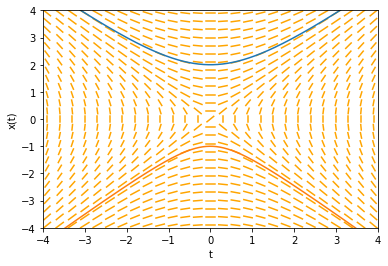

In [11]:
def foo(t, x):
    return 5/4 * t / x

def foo1(t):
    return np.sqrt(5/4*t*t + 4)
def foo2(t):
    return -np.sqrt(5/4*t*t + 1)
fooSet = set([foo1, foo2])

slopeField(foo, fooSet)

### Task 2

/home/pavlik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


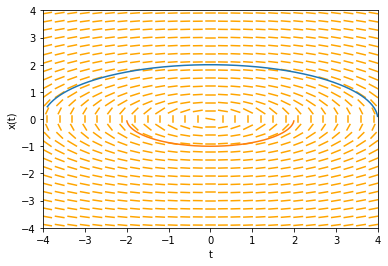

In [12]:
def foo(t, x):
    return -1/4 * t / x

def foo1(t):
    return np.sqrt(4 - t*t/4)
def foo2(t):
    return -np.sqrt(1 - t*t/4)
fooSet = set([foo1, foo2])

slopeField(foo, fooSet)


### Task 3

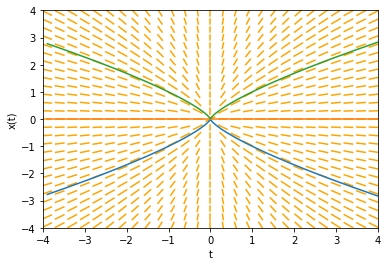

In [13]:
def foo(t, x):
    return 3/4 * x / t

def foo1(t):
    return abs(t) ** (3/4)
def foo2(t):
    return -abs(t) ** (3/4)
def foo3(t):
    return t * 0
fooSet = set([foo1, foo2, foo3])

slopeField(foo, fooSet)

### Task 4

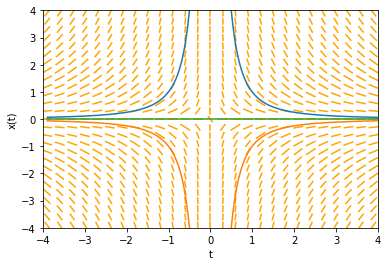

In [14]:
def foo(t, x):
    return -2 * x / t

def foo1(t):
    return 1 / (t * t)
def foo2(t):
    return -1 / (t * t)
def foo3(t):
    return t * 0
fooSet = set([foo1, foo2, foo3])

slopeField(foo, fooSet)

### Task 5

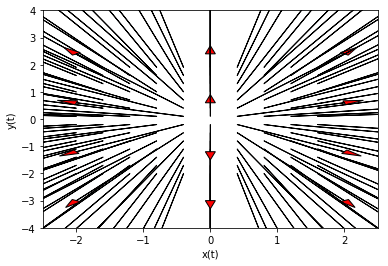

In [15]:
def foo(x, y): # first equation
    return 3 * x, 4 * y
vectorField(foo)

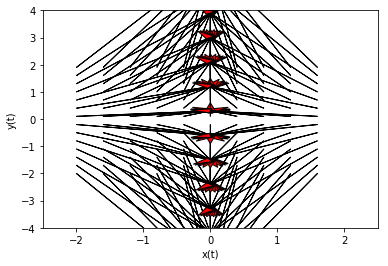

In [16]:
def foo(x, y): # second equation
    return -2 * x, y
vectorField(foo)

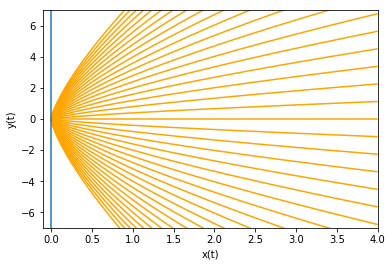

In [17]:
def foo(x): # first equation
    return x**(3/4)
phasePath(foo)

#### Выбранная фазовая кривая отмечена синим цветом (вертикальная прямая). Это верно, так как при заданом начальном решении, x постоянный и равен нулю.

/home/pavlik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


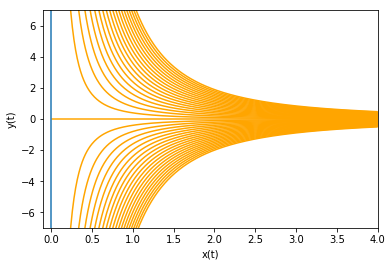

In [18]:
def foo(x): # second equation
    return x**(-2)
phasePath(foo)

#### Здесь абсолютно аналогичные рассуждения.

### Task 6

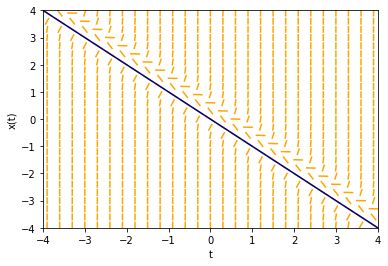

In [29]:
def foo(t, x): # Исходное уравнение
    return (-4 * t -4 * x + 1) ** 2 - 2
def fooAdd(t):
    return -t
slopeField(foo, None, fooAdd)

#### Where blue line is solution, which satisfies starting condition x(-1) = 1.

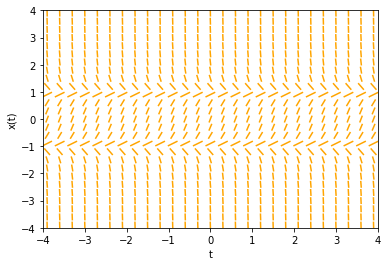

In [20]:
def foo(t, z): # Новое уравнение
    return 4 - 4 * z**2
slopeField(foo)

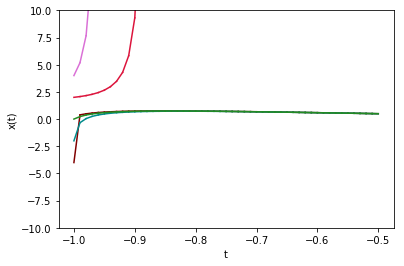

In [21]:
def foo(t, x): # Исходное уравнение
    return (-4 * t -4 * x + 1) ** 2 - 2
integralCurve(foo, -1, -0.5, [-4, -2, 0, 2, 4], 0.01)

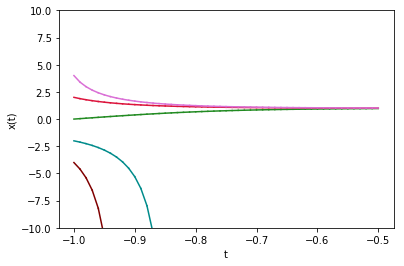

In [22]:
def foo(t, z): # Новое уравнение
    return 4 - 4 * z**2
integralCurve(foo, -1, -0.5, [-4, -2, 0, 2, 4], 0.01)

### Task 7

Current interval is separated into 10 parts
In 0.25: real ans is 3.4082234423358275 and we have 2.7260502089582683
In 0.35: real ans is 11.681373800310224 and we have 3.5691851831344104


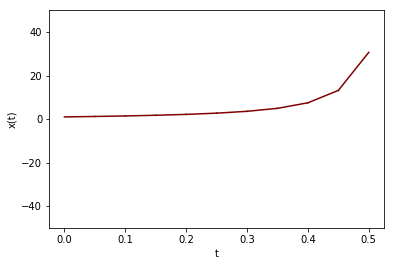

Current interval is separated into 30 parts
In 0.25: real ans is 3.4082234423358275 and we have 3.0974809493592756
In 0.30: real ans is 5.331855223458727 and we have 4.416222639135951
In 0.35: real ans is 11.681373800310224 and we have 7.233156011034082


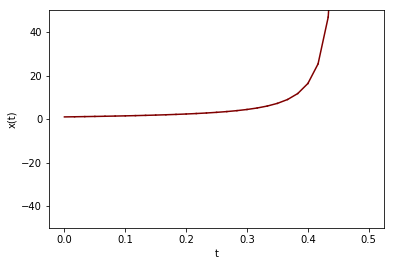

Current interval is separated into 50 parts
In 0.25: real ans is 3.4082234423358275 and we have 3.2061306633143
In 0.30: real ans is 5.331855223458727 and we have 4.708370754104571
In 0.35: real ans is 11.681373800310224 and we have 7.2424448518201885
0.46


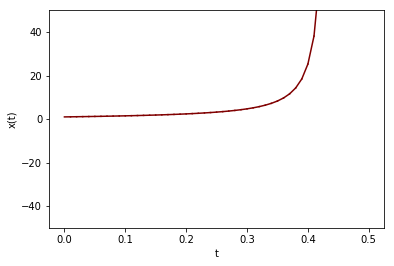

Current interval is separated into 100 parts
In 0.25: real ans is 3.4082234423358275 and we have 3.300223322971466
In 0.30: real ans is 5.331855223458727 and we have 4.983833709719369
In 0.35: real ans is 11.681373800310224 and we have 8.782081997231977
0.425


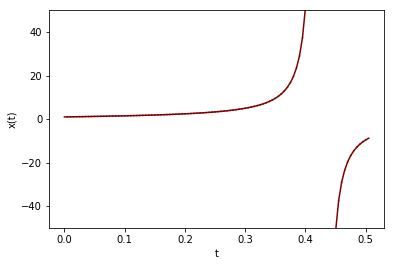

Current interval is separated into 300 parts
In 0.25: real ans is 3.4082234423358275 and we have 3.370457876497865
0.405


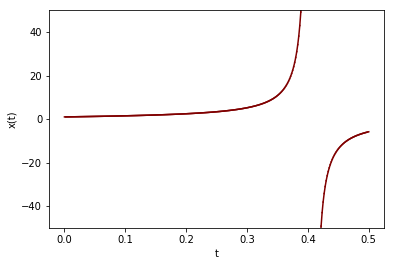

Current interval is separated into 500 parts
In 0.25: real ans is 3.4082234423358275 and we have 3.3853373792346737
In 0.30: real ans is 5.331855223458727 and we have 5.254867189946802
In 0.35: real ans is 11.681373800310224 and we have 10.901720394329187
0.401


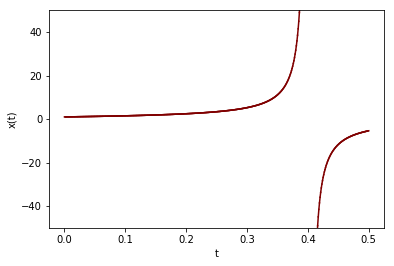

Current interval is separated into 1000 parts
In 0.25: real ans is 3.4082234423358275 and we have 3.3966936220422883
In 0.30: real ans is 5.331855223458727 and we have 5.292834588205765
In 0.35: real ans is 11.681373800310224 and we have 11.273365686727058
0.397


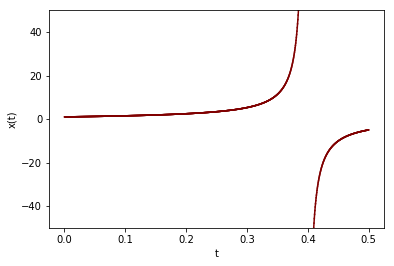

Current interval is separated into 10000 parts
In 0.25: real ans is 3.4082234423358275 and we have 3.4070625156695233
In 0.30: real ans is 5.331855223458727 and we have 5.327904313713967
In 0.35: real ans is 11.681373800310224 and we have 11.638767399181665
0.39315


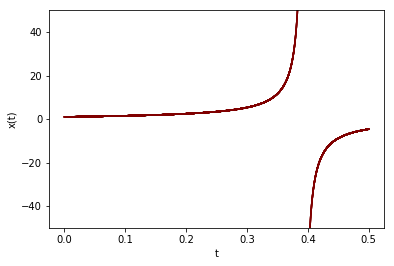

In [23]:
def foo(t, x): # Исходное уравнение
    return 2 * x * x + 2
params = [10, 30, 50, 100, 300, 500, 1000, 10000]
for elem in params:
    print("Current interval is separated into", elem, "parts")
    euler(foo, 0, 0.5, 1, 0.5 / elem) # func, start, finish, start solution, step

## Let's make a conlusion:

To reach required accuracy in 0.25 we make about 1000 steps (here and later I use steps as amount of parts we split intersection with). In 0.3 and 0.35 -- about 10000 steps.

To bring value closer in 0.4 I don't have enough computer powers, cause that point is too close to the gap and we should decrease threshold near the gap, but then we overflow real numbers in Python 3.